<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:10: SyntaxWarning: invalid escape sequence '\o'
C:\Users\3 Stars Laptop\AppData\Local\Temp\ipykernel_720\3001962554.py:10: SyntaxWarning: invalid escape sequence '\o'
  image = cv2.imread('D:\open CV\kitty.jpeg')


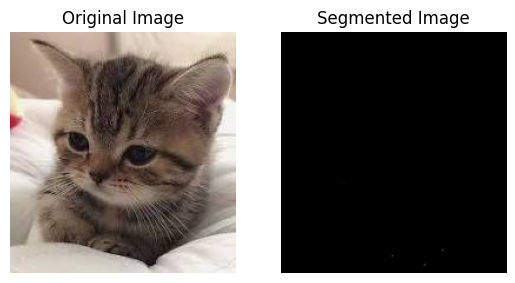

In [1]:
# Python program to illustrate foreground extraction using GrabCut algorithm

# organize imports
import numpy as np
import cv2
from matplotlib import pyplot as plt
 
# path to input image specified and 
# image is loaded with imread command
image = cv2.imread('D:\open CV\kitty.jpeg')
 
# create a simple mask image similar
# to the loaded image, with the 
# shape and return type
mask = np.zeros(image.shape[:2], np.uint8)
 
# specify the background and foreground model
# using numpy the array is constructed of 1 row
# and 65 columns, and all array elements are 0
# Data type for the array is np.float64 (default)
backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)
 
# define the Region of Interest (ROI)
# as the coordinates of the rectangle
# where the values are entered as
# (startingPoint_x, startingPoint_y, width, height)
# these coordinates are according to the input image
# it may vary for different images
rectangle = (20, 100, 150, 150)
 
# apply the grabcut algorithm with appropriate
# values as parameters, number of iterations = 3 
# cv2.GC_INIT_WITH_RECT is used because
# of the rectangle mode is used 
cv2.grabCut(image, mask, rectangle,  
            backgroundModel, foregroundModel,
            3, cv2.GC_INIT_WITH_RECT)
 
# In the new mask image, pixels will 
# be marked with four flags 
# four flags denote the background / foreground 
# mask is changed, all the 0 and 2 pixels 
# are converted to the background
# mask is changed, all the 1 and 3 pixels
# are now the part of the foreground
# the return type is also mentioned,
# this gives us the final mask
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')
 
# The final mask is multiplied with 
# the input image to give the segmented image.
image_segmented = image * mask2[:, :, np.newaxis]
 
# output segmented image with colorbar
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Display the segmented image
plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(cv2.cvtColor(image_segmented, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()